https://nbviewer.jupyter.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb

In [15]:
from ipywidgets import widgets, interact, interactive, fixed
from IPython.display import display


Text und Button

In [18]:
text = widgets.Text()
text.value = "Hallo"
button = widgets.Button(description="Print Value")
display(text)
display(button)

def click(b):
    print(text.value)
button.on_click(click)

Dynamic Interaction

In [22]:
def p(x):
    print(x)
    
interact(p, x=True)
interact(p, x=[2,4])

3


In [36]:
#Widgets
checkboxes2 = []
nameFruits = widgets.Text()
selectedFruits = widgets.Label()
basket = widgets.HBox()
btnFeast = widgets.Button(description="Print Feast")

#Functions
def addFruit(sender):
    checkboxes2.append(widgets.Checkbox(description = nameFruits.value, value=False, width=90))
    basket.children=[i for i in checkboxes2]

def printFeast(sender):
    feast = ""
    for cb in checkboxes2:
        if cb.value :
            feast += cb.description+ " "
    selectedFruits.value = feast

#Eventlistener
nameFruits.on_submit(addFruit)    
btnFeast.on_click(printFeast)

#Display
display(widgets.Label(value="Input a new Fruit into the basket"))
display(nameFruits)
display(widgets.Label(value="Select Fruit you want to eat"))
display(basket)
display(widgets.Label(value="You choose to eat:"))
display(selectedFruits)
display(btnFeast)

Fucked up example that can ping websites and compare the results. Only Advanced users !!!

<IPython.core.display.Javascript object>


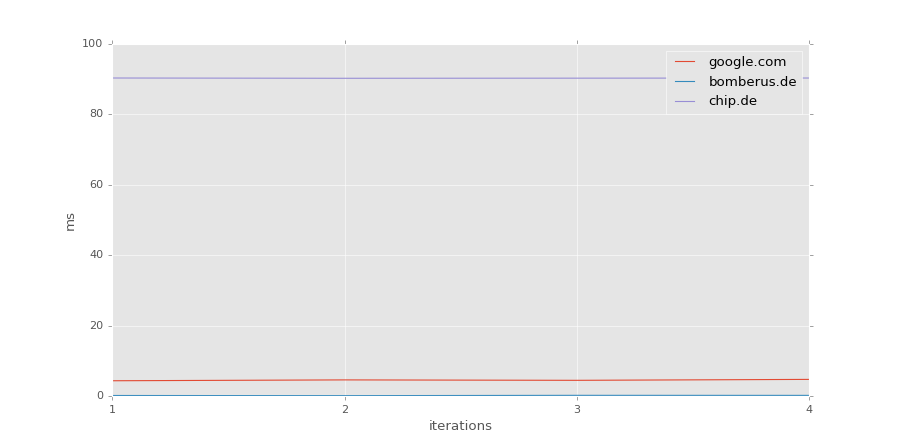

In [25]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from ipywidgets import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()